In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import mean_squared_error, r2_score

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2342, 139), (586, 139), (2342, 1), (586, 1))

# Neural Network

In [25]:
st = StandardScaler()
scaled_X_train = st.fit_transform(X_train)

# Model
model = Sequential()
model.add(Dense(200, input_dim=139, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 5ms/step - loss: 68.9916 - mean_squared_error: 68.9916 - val_loss: 13.8184 - val_mean_squared_error: 13.8184
Epoch 2/500
59/59 [==============================] - 0s 3ms/step - loss: 2.1870 - mean_squared_error: 2.1870 - val_loss: 0.1594 - val_mean_squared_error: 0.1594
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1585 - mean_squared_error: 0.1585 - val_loss: 0.1449 - val_mean_squared_error: 0.1449
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1530 - mean_squared_error: 0.1530 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1431 - mean_squared_error: 0.1431 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.1009 - val_mean_squared_error: 0.1009
Epoch 7/500
59/59 [===========

Training MSE: 0.0004523644456639886
Validation MSE: 0.015892498195171356


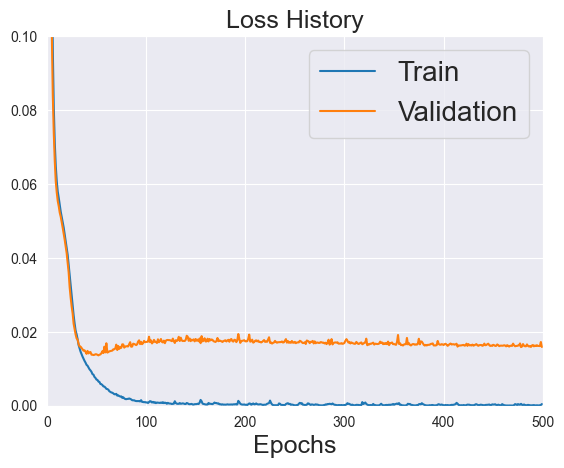

In [26]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 0.1])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [27]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 1ms/step


In [28]:
scaled_X_test = st.transform(X_test)
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 833us/step


In [29]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 111333159.574
Test MSE: 940560280.819
Train R^2: 0.981
Test R^2: 0.883


Text(0, 0.5, 'Sale_Price')

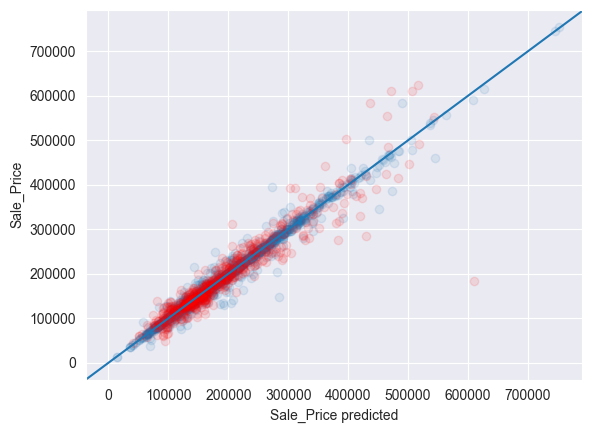

In [30]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre l'overfitting aggiungendo dei Dropout layer

In [31]:
# Model
model = Sequential()
model.add(Dense(200, input_dim=139, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(), metrics=['mean_squared_error'])

hist = model.fit(x=scaled_X_train, y=Y_train, epochs=500, validation_split=.2)

Epoch 1/500
59/59 [==============================] - 1s 4ms/step - loss: 64.3340 - mean_squared_error: 64.3340 - val_loss: 2.6407 - val_mean_squared_error: 2.6407
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 9.6935 - mean_squared_error: 9.6935 - val_loss: 0.7611 - val_mean_squared_error: 0.7611
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 8.8276 - mean_squared_error: 8.8276 - val_loss: 0.9261 - val_mean_squared_error: 0.9261
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 8.0337 - mean_squared_error: 8.0337 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 9.3580 - mean_squared_error: 9.3580 - val_loss: 0.6358 - val_mean_squared_error: 0.6358
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 8.1794 - mean_squared_error: 8.1794 - val_loss: 0.7557 - val_mean_squared_error: 0.7557
Epoch 7/500
59/59 [=============

Training MSE: 0.010126796551048756
Validation MSE: 0.01580977626144886


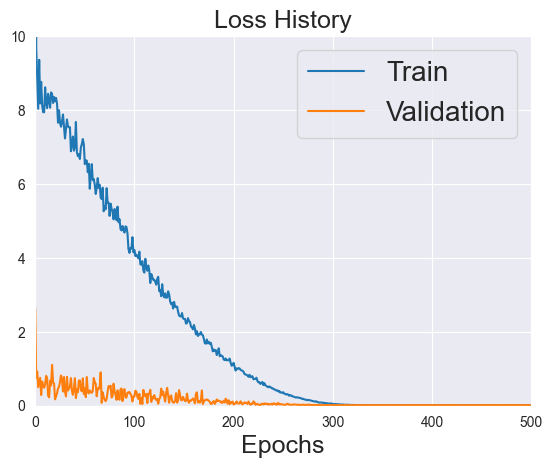

In [32]:
fig, axes = plt.subplots()

axes.plot(hist.history['loss'], label='Train')
axes.plot(hist.history['val_loss'], label='Validation')
axes.set_title("Loss History", fontsize=18)
axes.set_xlabel("Epochs", fontsize=18)
axes.legend(fontsize=20)
axes.set_xlim([0, 500])
axes.set_ylim([0, 10])

# Final accuracy
print ("Training MSE:", hist.history['mean_squared_error'][-1])
print ("Validation MSE:", hist.history['val_mean_squared_error'][-1])

In [33]:
model.evaluate(scaled_X_train, Y_train)
train_pre = model.predict(scaled_X_train)

74/74 [==============================] - 0s 1ms/step


In [34]:
model.evaluate(scaled_X_test, Y_test)
test_pre = model.predict(scaled_X_test)

19/19 [==============================] - 0s 945us/step


In [35]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 173897020.263
Test MSE: 829736791.077
Train R^2: 0.971
Test R^2: 0.897


## Proviamo a ridurre il numero di features

In [51]:
st = StandardScaler()
scaled_X_train_reduced = st.fit_transform(X_train[FS_RF])

# Model
model = Sequential()
model.add(Dense(200, input_dim=len(FS_RF), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='relu'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())

model.fit(x=scaled_X_train_reduced, y=Y_train, epochs=500)

Epoch 1/500
74/74 [==============================] - 1s 2ms/step - loss: 54.0698
Epoch 2/500
74/74 [==============================] - 0s 2ms/step - loss: 2.5504
Epoch 3/500
74/74 [==============================] - 0s 1ms/step - loss: 2.4148
Epoch 4/500
74/74 [==============================] - 0s 2ms/step - loss: 2.1798
Epoch 5/500
74/74 [==============================] - 0s 2ms/step - loss: 2.2716
Epoch 6/500
74/74 [==============================] - 0s 1ms/step - loss: 2.0311
Epoch 7/500
74/74 [==============================] - 0s 1ms/step - loss: 2.0030
Epoch 8/500
74/74 [==============================] - 0s 1ms/step - loss: 1.9560
Epoch 9/500
74/74 [==============================] - 0s 1ms/step - loss: 1.8293
Epoch 10/500
74/74 [==============================] - 0s 1ms/step - loss: 1.8785
Epoch 11/500
74/74 [==============================] - 0s 1ms/step - loss: 2.0536
Epoch 12/500
74/74 [==============================] - 0s 1ms/step - loss: 1.8225
Epoch 13/500
74/74 [================

In [52]:
model.evaluate(scaled_X_train_reduced, Y_train)
train_pre = model.predict(scaled_X_train_reduced)

74/74 [==============================] - 0s 1ms/step


In [53]:
scaled_X_test_reduced = st.transform(X_test[FS_RF])
model.evaluate(scaled_X_test_reduced, Y_test)
test_pre = model.predict(scaled_X_test_reduced)

19/19 [==============================] - 0s 1ms/step


In [54]:
print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 38779224.456
Test MSE: 922436795.260
Train R^2: 0.993
Test R^2: 0.885


Text(0, 0.5, 'Sale_Price')

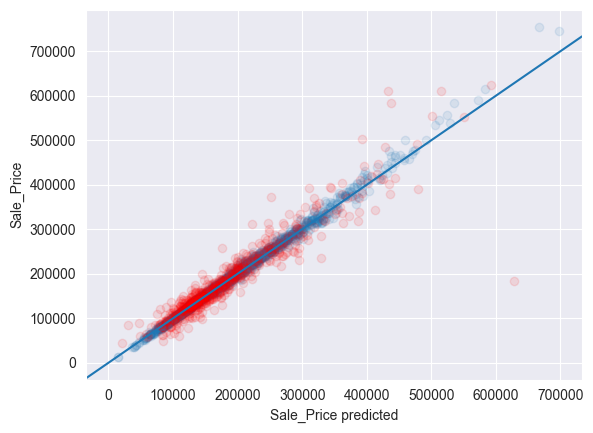

In [55]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')